#Overfitting (High Variance) Example for Decision Tree Classifier

#Importing Libraries

In [3]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from matplotlib import pyplot

#Loading Dataset

In [4]:
# synthetic classification dataset

# define dataset
X, y = make_classification(n_samples=140000, n_features=15, n_informative=8, n_redundant=7, random_state=59)
# summarize the dataset
print(X.shape, y.shape)

(140000, 15) (140000,)


#Splitting the Data

In [5]:
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)
# summarize the shape of the train and test sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(119000, 15) (21000, 15) (119000,) (21000,)


In [6]:
# define the tree depths to evaluate
depth_values = [i for i in range(1, 10)]

# evaluate a decision tree for each depth

In [7]:
test_scores= []
train_scores=[]
for i in depth_values:
	# configure the model
	model = DecisionTreeClassifier(max_depth=i)
	# fit model on the training dataset
	model.fit(X_train, y_train)
	# evaluate on the train dataset
	train_yhat = model.predict(X_train)
	train_acc = metrics.accuracy_score(y_train, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model.predict(X_test)
	test_acc = metrics.accuracy_score(y_test, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

>1, train: 0.802, test: 0.800
>2, train: 0.804, test: 0.808
>3, train: 0.884, test: 0.884
>4, train: 0.900, test: 0.898
>5, train: 0.910, test: 0.907
>6, train: 0.923, test: 0.922
>7, train: 0.933, test: 0.930
>8, train: 0.941, test: 0.936
>9, train: 0.949, test: 0.942


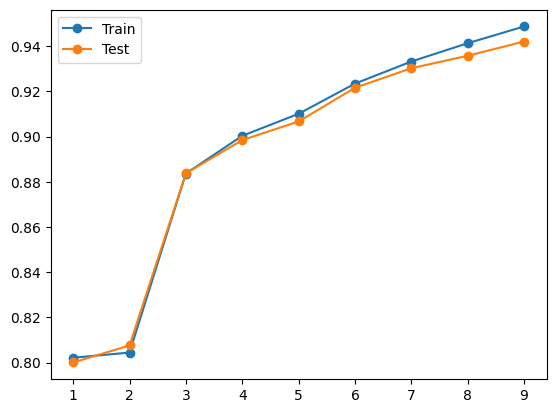

In [8]:
pyplot.plot(depth_values, train_scores, '-o', label='Train')
pyplot.plot(depth_values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

*This is the best fit we get, if we do early stopping.*

#Underfitting (High Bias) in KNN classification

In [10]:
# evaluate knn performance on train and test sets with different numbers of neighbors
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot
# create dataset
X, y = make_classification(n_samples=10000, n_features=20, n_classes=3, n_informative=18, n_redundant=2, random_state=50)
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)
# define lists to collect scores
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
k_values = [i for i in range(1, 35)]
# evaluate a decision tree for each depth
for i in k_values:
	# configure the model
	model = KNeighborsClassifier(n_neighbors=i)
	# fit model on the training dataset
	model.fit(X_train, y_train)
	# evaluate on the train dataset
	train_yhat = model.predict(X_train)
	train_acc = accuracy_score(y_train, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model.predict(X_test)
	test_acc = accuracy_score(y_test, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

>1, train: 1.000, test: 0.917
>2, train: 0.959, test: 0.905
>3, train: 0.965, test: 0.934
>4, train: 0.960, test: 0.935
>5, train: 0.958, test: 0.941
>6, train: 0.959, test: 0.943
>7, train: 0.956, test: 0.948
>8, train: 0.954, test: 0.938
>9, train: 0.952, test: 0.942
>10, train: 0.951, test: 0.941
>11, train: 0.950, test: 0.939
>12, train: 0.949, test: 0.936
>13, train: 0.947, test: 0.937
>14, train: 0.948, test: 0.937
>15, train: 0.945, test: 0.938
>16, train: 0.945, test: 0.938
>17, train: 0.943, test: 0.938
>18, train: 0.943, test: 0.933
>19, train: 0.941, test: 0.935
>20, train: 0.942, test: 0.939
>21, train: 0.939, test: 0.933
>22, train: 0.938, test: 0.935
>23, train: 0.936, test: 0.932
>24, train: 0.937, test: 0.932
>25, train: 0.935, test: 0.931
>26, train: 0.936, test: 0.931
>27, train: 0.935, test: 0.931
>28, train: 0.934, test: 0.931
>29, train: 0.933, test: 0.929
>30, train: 0.933, test: 0.924
>31, train: 0.933, test: 0.926
>32, train: 0.933, test: 0.923
>33, train: 0.932

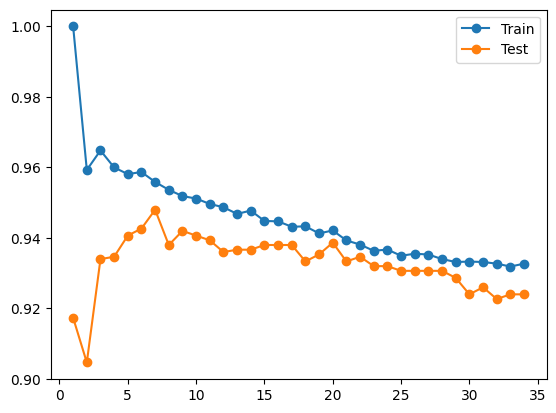

In [11]:
# plot of train and test scores vs number of neighbors
pyplot.plot(k_values, train_scores, '-o', label='Train')
pyplot.plot(k_values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

# Conclusion
*Overfit*
- In overfitting by increasing the number of features and using early stopping technique, we can achieve higher accuracy.

*Underfit*
- In underfitting by decrasing the classes and increases the no. of samples we can get higher accuracy.
